In [104]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

In [105]:
N = 100
init_random = np.random.random((N,N))
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.75] = 1
lattice_n[init_random<0.75] = -1

init_random = np.random.random((N,N))
lattice_p = np.zeros((N, N))
lattice_p[init_random>=0.25] = 1
lattice_p[init_random<0.25] = -1

In [106]:
def get_energy(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()/2

get_energy(lattice_n)

-4792.0

In [107]:
def get_energy(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()/2

get_energy(lattice_p)


-4844.0

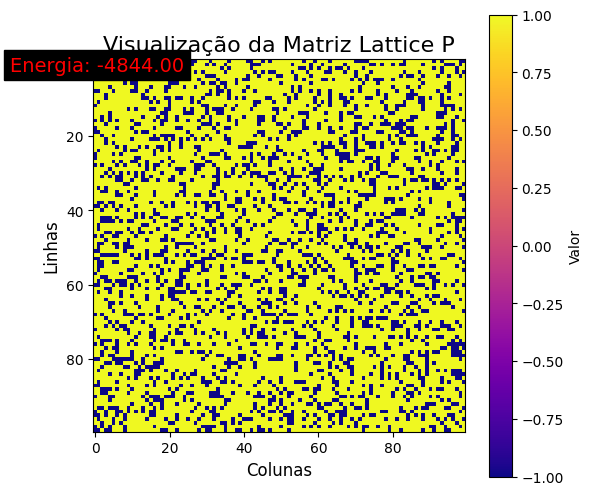

In [108]:
# Plotar a matriz lattice_p
plt.figure(figsize=(6, 6))  # Ajustar o tamanho da figura para melhor visualização
plt.imshow(lattice_p, cmap='plasma', interpolation='nearest')  # Adicionar mapa de cores
plt.colorbar(label='Valor')  # Adicionar a barra de cores com rótulo

# Adicionar título e rótulos aos eixos
plt.title('Visualização da Matriz Lattice P', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Linhas', fontsize=12)

# Adicionar o texto com o valor da energia sobre a imagem
plt.text(0.5, 0.99, f'Energia: {get_energy(lattice_p):.2f}', 
         ha='center', va='center', 
         fontsize=14, color='red', 
         bbox=dict(facecolor='black', alpha=1))

# Exibir o gráfico
plt.show()

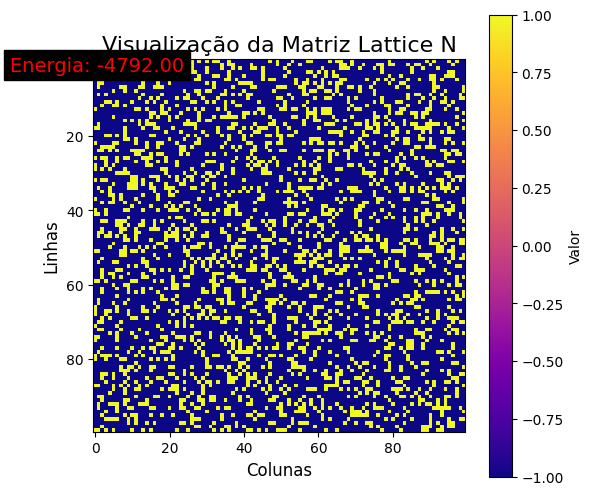

In [109]:
# Plotar a matriz lattice_n
plt.figure(figsize=(6, 6))  # Ajustar o tamanho da figura para melhor visualização
plt.imshow(lattice_n, cmap='plasma', interpolation='nearest')  # Adicionar mapa de cores
plt.colorbar(label='Valor')  # Adicionar a barra de cores com rótulo

# Adicionar título e rótulos aos eixos
plt.title('Visualização da Matriz Lattice N', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Linhas', fontsize=12)

# Adicionar o texto com o valor da energia sobre a imagem
plt.text(0.5, 0.99, f'Energia: {get_energy(lattice_n):.2f}', 
         ha='center', va='center', 
         fontsize=14, color='red', 
         bbox=dict(facecolor='black', alpha=1))

# Exibir o gráfico
plt.show()

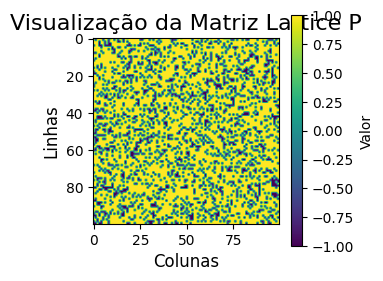

In [110]:
# Plotar a matriz lattice_p
plt.figure(figsize=(3, 3))  # Ajustar o tamanho da figura para melhor visualização
plt.imshow(lattice_p, cmap='viridis', interpolation='bilinear')  # Adicionar mapa de cores
plt.colorbar(label='Valor')  # Adicionar a barra de cores com rótulo

# Adicionar título e rótulos aos eixos
plt.title('Visualização da Matriz Lattice P', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Linhas', fontsize=12)

# Exibir o gráfico
plt.show()

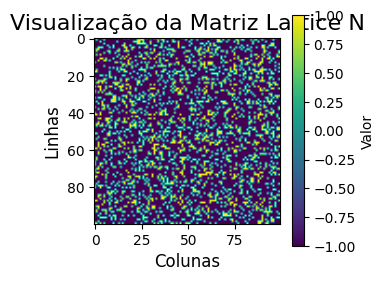

In [111]:
# Plotar a matriz lattice_p
plt.figure(figsize=(3, 3))  # Ajustar o tamanho da figura para melhor visualização
plt.imshow(lattice_n, cmap='viridis', interpolation='bilinear')  # Adicionar mapa de cores
plt.colorbar(label='Valor')  # Adicionar a barra de cores com rótulo

# Adicionar título e rótulos aos eixos
plt.title('Visualização da Matriz Lattice N', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Linhas', fontsize=12)

# Exibir o gráfico
plt.show()

In [112]:
@numba.njit("UniTuple(f8[:], 2)(f8[:,:], i8, f8, f8)", nopython=True, nogil=True)
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    for t in range(0,times-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        
        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
            
    return net_spins, net_energy


/home/meteoro/Documentos/saturn/venv/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [113]:
bj = 0.4

spins, energies = metropolis(lattice_n, 1000000, bj, get_energy(lattice_n))

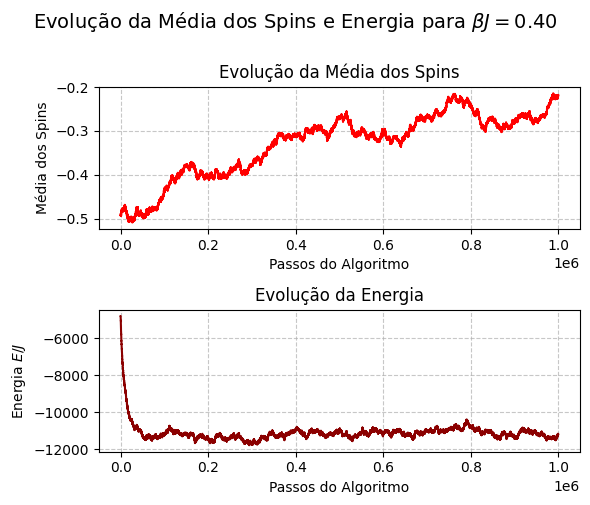

In [115]:
#À esquerda: A média dos spins (spins/N**2) ao longo dos passos do algoritmo, o que pode representar a evolução do magnetismo médio no sistema.
#À direita: A energia do sistema (energies) ao longo dos passos do algoritmo.

# Cores e estilos
line_color1 = 'red'  # Cor para o gráfico da média dos spins
line_color2 = 'darkred'  # Cor para o gráfico da energia
line_style = '-'  # Estilo da linha
line_width = 1.5  # Largura da linha

# Criação dos gráficos empilhados verticalmente
fig, axes = plt.subplots(2, 1, figsize=(6, 5), tight_layout=True)

# Gráfico da média dos spins
ax = axes[0]
ax.plot(spins / N**2, color=line_color1, linestyle=line_style, linewidth=line_width)
ax.set_xlabel('Passos do Algoritmo', fontsize=10)
ax.set_ylabel('Média dos Spins', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)  # Grid mais leve e estilizado
ax.set_title('Evolução da Média dos Spins', fontsize=12)

# Gráfico da energia
ax = axes[1]
ax.plot(energies, color=line_color2, linestyle=line_style, linewidth=line_width)
ax.set_xlabel('Passos do Algoritmo', fontsize=10)
ax.set_ylabel('Energia $E/J$', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)  # Grid mais leve e estilizado
ax.set_title('Evolução da Energia', fontsize=12)

# Adiciona o título com o valor de βJ formatado
fig.suptitle(r'Evolução da Média dos Spins e Energia para $\beta J=$' + f'{bj:.2f}', y=1, fontsize=14)

plt.show()

In [124]:
def get_spin_energy(lattice, BJs):
    ms = np.zeros(len(BJs))
    E_means = np.zeros(len(BJs))
    E_stds = np.zeros(len(BJs))
    for i, bj in enumerate(BJs):
        spins, energies = metropolis(lattice, 1000000, bj, get_energy(lattice))
        ms[i] = spins[-100000:].mean()/N**2
        E_means[i] = energies[-100000:].mean()
        E_stds[i] = energies[-100000:].std()
    return ms, E_means, E_stds
    
BJs = np.arange(0.1, 2, 0.05)
ms_n, E_means_n, E_stds_n = get_spin_energy(lattice_n, BJs)
ms_p, E_means_p, E_stds_p = get_spin_energy(lattice_p, BJs)

In [125]:
print("Magnetizations (lattice_n):", ms_n)
print("Energy Means (lattice_n):", E_means_n)
print("Energy Stds (lattice_n):", E_stds_n)

print("Magnetizations (lattice_p):", ms_p)
print("Energy Means (lattice_p):", E_means_p)
print("Energy Stds (lattice_p):", E_stds_p)

Magnetizations (lattice_n): [ 0.00344847 -0.002182    0.00355006 -0.00101538  0.0059603   0.00713561
 -0.24054749 -0.73589763 -0.88351259 -0.95019815 -0.96671983 -0.98049288
 -0.98999465 -0.99157441 -0.99438028 -0.99719318 -0.99796173 -0.99856056
 -0.99902803 -0.99922869 -0.99968667 -0.99957354 -0.99979469 -0.9997879
 -0.99971424 -0.99983442 -0.99996218 -0.99996587 -0.9999714  -0.99998538
 -1.         -1.         -0.99995357 -0.99999582 -1.         -1.
 -1.         -1.        ]
Energy Means (lattice_n): [ -2001.82362  -3068.59484  -4285.38462  -5548.72652  -6921.23486
  -8964.86864 -11050.14518 -14700.69416 -16845.94828 -18269.59348
 -18840.16532 -19155.5062  -19451.25994 -19513.66372 -19605.63968
 -19697.89758 -19727.48482 -19753.28578 -19764.83304 -19772.52412
 -19787.74564 -19785.519   -19793.08724 -19791.72582 -19788.73512
 -19793.4069  -19798.86534 -19798.63464 -19798.90144 -19799.41512
 -19800.      -19800.      -19798.25488 -19799.83296 -19800.
 -19800.      -19800.      -19800.

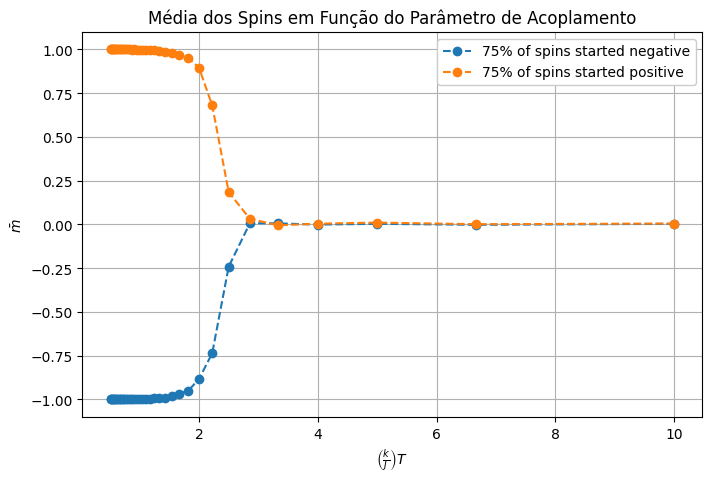

In [127]:
# Criar o gráfico
plt.figure(figsize=(8,5))
plt.plot(1/BJs, ms_n, 'o--', label='75% of spins started negative')
plt.plot(1/BJs, ms_p, 'o--', label='75% of spins started positive')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$\bar{m}$')
plt.title('Média dos Spins em Função do Parâmetro de Acoplamento')
plt.legend(facecolor='white', framealpha=1)
plt.grid(True)
plt.show()

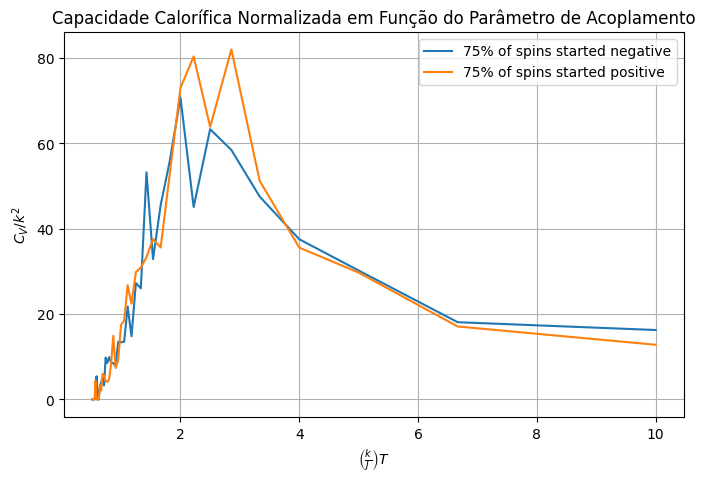

In [130]:
# Criar o gráfico
plt.figure(figsize=(8,5))
plt.plot(1/BJs, E_stds_n * BJs, label='75% of spins started negative')
plt.plot(1/BJs, E_stds_p * BJs, label='75% of spins started positive')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$C_V / k^2$')
plt.title('Capacidade Calorífica Normalizada em Função do Parâmetro de Acoplamento')
plt.legend()
plt.grid(True)
plt.show()

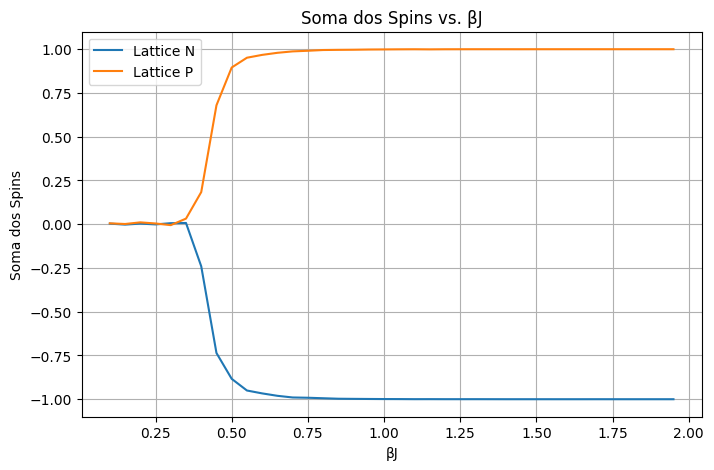

In [136]:
# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(BJs, ms_n, label='Lattice N')
plt.plot(BJs, ms_p, label='Lattice P')
plt.title('Soma dos Spins vs. βJ')
plt.xlabel('βJ')
plt.ylabel('Soma dos Spins')
plt.legend()
plt.grid(True)
plt.show()

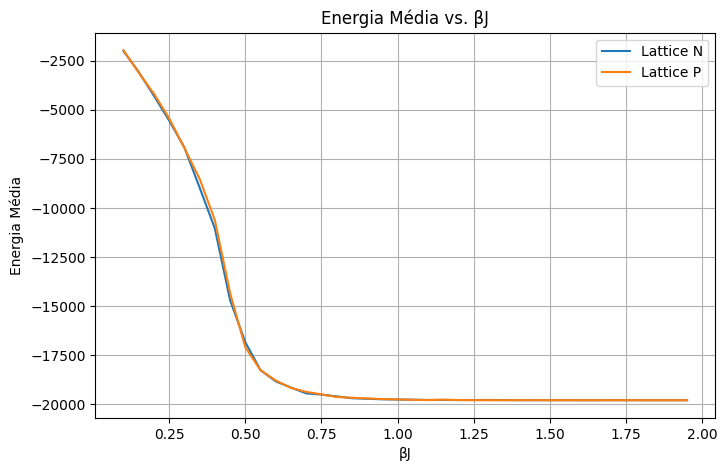

In [140]:
# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(BJs, E_means_n, label='Lattice N')
plt.plot(BJs, E_means_p, label='Lattice P')
plt.title('Energia Média vs. βJ')
plt.xlabel('βJ')
plt.ylabel('Energia Média')
plt.legend()
plt.grid(True)
plt.show()

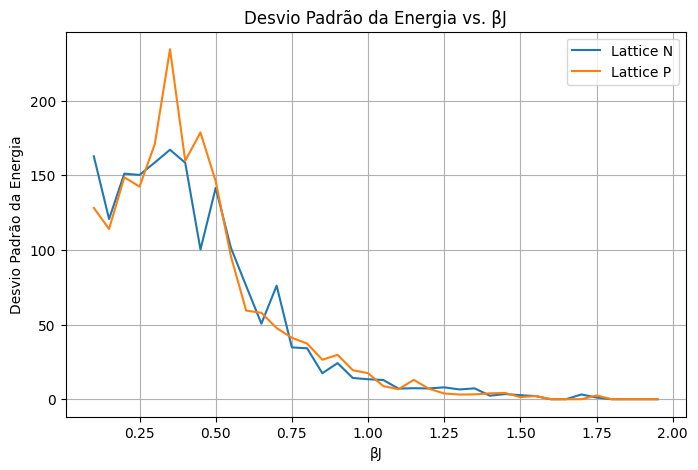

In [141]:
# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(BJs, E_stds_n, label='Lattice N')
plt.plot(BJs, E_stds_p, label='Lattice P')
plt.title('Desvio Padrão da Energia vs. βJ')
plt.xlabel('βJ')
plt.ylabel('Desvio Padrão da Energia')
plt.legend()
plt.grid(True)
plt.show()